<a href="https://colab.research.google.com/github/limdiny/ML/blob/main/%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망
* 합성곱

밀집층과 비슷하게 입력과 가중치를 곱하고 절편을 더하는 선형 계산이다. 밀집층과 다르게 각 합성곱은 입력 전체가 아니라 일부만 사용하여 선형 계산을 수행한다.


* 필터

밀집층으로 보면 뉴런에 해당하는 것이다. 필터의 가중치와 절편을 종종 커널이라고 부르기도 한다. 자주 사용되는 커널의 크기는 (3,3) 또는 (5,5)이다. **커널의 깊이는 입력의 깊이와 같다.**


* 특성맵

합성곱 층이나 풀링 층의 출력 배열을 의미한다. **필터 하나가 하나의 특성맵을 만든다.** 합성곱 층에서 5개의 필터를 적용하면 5개의 특성맵이 만들어진다. 

* 패딩

합성곱 층의 입력 주위에 추가한 0으로 채워진 픽셀이다. 패딩을 사용하지않으면 valid 패딩이라고 한다. 합성곱 층의 출력 크기를 입력과 동일하게 만들기 위해 입력에 패딩을 추가하는 것을 same 패딩이라고 한다. 

* 스트라이드

합성곱 층에서 필터가 입력 위를 이동하는 크기이다. 일반적으로 stride는 1픽셀을 사용한다.

* 풀링

가중치가 없고 특성맵의 가로세로 크기를 줄이는 역할을 수행한다. 대표적으로 최대풀링,평균풀링이 있으며 (2,2) 풀랑으로 입력을 절반으로 줄인다. 

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1,28,28,1)/255.0
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


* (48000,28,28) -> (48000,28,28,1) 로 reshape해줌
* Conv2D를 사용하기위해서는 깊이의 차원도 필요해서

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))


* (28,28,1) -> (28,28,32) -> (14,14,32)

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))


* (14,14,32) -> (14,14,64) -> (7,7,64)

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

* flatten으로 펴준다음 Dense 층으로 
* 은닉층과 출력층 사이에 dropout층을 넣어 과대적합을 막음

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0

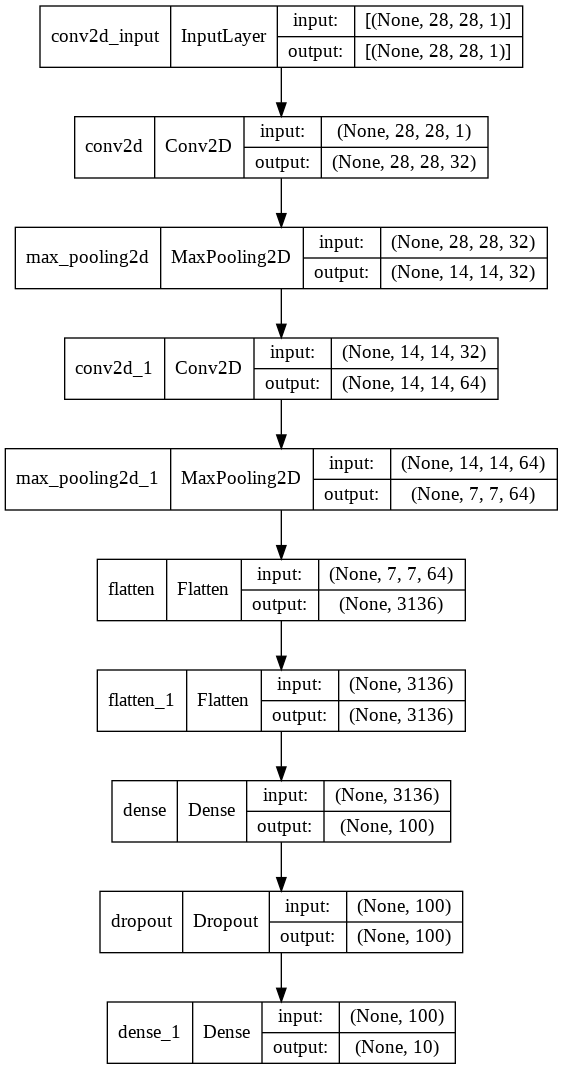

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history=model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 100s 66ms/step - loss: 0.5349 - accuracy: 0.8076 - val_loss: 0.3445 - val_accuracy: 0.8744
Epoch 2/20
1500/1500 [==============================] - 80s 53ms/step - loss: 0.3598 - accuracy: 0.8686 - val_loss: 0.3075 - val_accuracy: 0.8829
Epoch 3/20
1500/1500 [==============================] - 72s 48ms/step - loss: 0.3062 - accuracy: 0.8891 - val_loss: 0.2664 - val_accuracy: 0.9009
Epoch 4/20
1500/1500 [==============================] - 72s 48ms/step - loss: 0.2742 - accuracy: 0.9015 - val_loss: 0.2460 - val_accuracy: 0.9088
Epoch 5/20
1500/1500 [==============================] - 72s 48ms/step - loss: 0.2491 - accuracy: 0.9094 - val_loss: 0.2313 - val_accuracy: 0.9150
Epoch 6/20
1500/1500 [==============================] - 71s 47ms/step - loss: 0.2224 - accuracy: 0.9177 - val_loss: 0.2193 - val_accuracy: 0.9209
Epoch 7/20
1500/1500 [==============================] - 92s 61ms/step - loss: 0.2056 - accuracy: 0.9245 - val_loss: 0.2239 

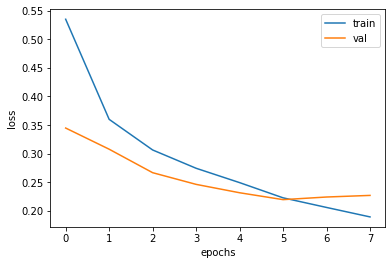

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 8s 21ms/step - loss: 0.2193 - accuracy: 0.9209


[0.21928265690803528, 0.9209166765213013]

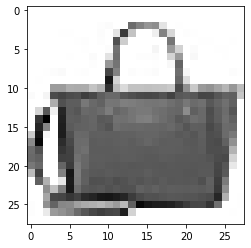

In [ ]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [ ]:
pred = model.predict(val_scaled[0:1])
print(pred)

[[1.47301943e-14 1.50413030e-22 4.07643291e-18 3.66427035e-16
  1.64494561e-15 1.21854685e-14 1.00131746e-14 6.42253395e-13
  1.00000000e+00 3.41403152e-15]]


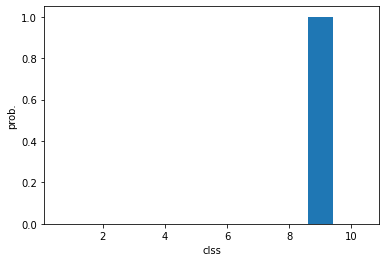

In [ ]:
plt.bar(range(1,11),pred[0])
plt.xlabel('clss')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(pred)])

가방


In [ ]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 5s 15ms/step - loss: 0.2429 - accuracy: 0.9120


[0.24289105832576752, 0.9120000004768372]

In [ ]:
model=keras.models.load_model('best-cnn-model.h5')

In [ ]:
model.layers

In [ ]:
conv = model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)

(3, 3, 1, 32) (32,)


* 첫번째 원소는 가중치, 두번째 원소는 절편

In [ ]:
conv_weights=conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.01530894 0.21732393


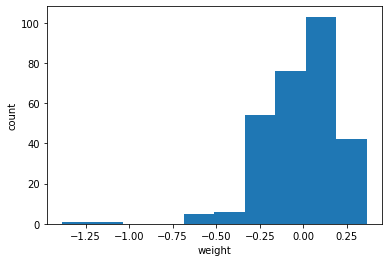

In [ ]:
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

* 히스토그램을 그리기 위해서는 일차원 배열로 reshape

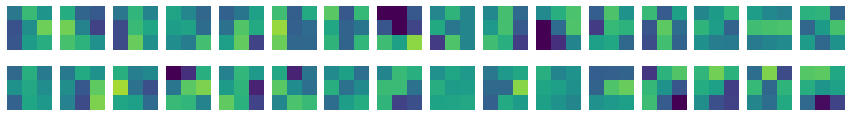

In [ ]:
fig,axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')

plt.show()